In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import sympy as sp
from sympy import *
from sympy.matrices import Matrix

## $\theta$-módszer: <br />
$$y_{n+1}=y_n+\tau[(1-\theta)f(t_n,y_n)+\theta f(t_{n+1},y_{n+1})]$$

Stabilitási függvénye: 
$$R(z)=\dfrac{1+(1-\theta)z}{1-\theta z}$$

In [6]:
def theta_stab_fv(theta: float):
    if theta < 0 or theta > 1:
        print("Hibás theta érték")
        return

    z=sp.symbols('z')
    R=sp.Function('R')
    R=(1+(1-theta)*z)/(1-theta*z)
    return R, theta

In [ ]:
def stab_tart_theta(R, theta: int = 0):
    z=sp.symbols('z')
    inequality=sp.Eq(R,1)
    inequality=sp.lambdify((z),np.abs(R))
    x=np.linspace(-4,4,400)
    y=np.linspace(-4,4,400)
    X, Y = np.meshgrid(x, y)
    Z=X+1j*Y
    F1=inequality(Z)

    plt.figure(figsize=(6, 6), dpi=150)
    plt.grid(True)
    plt.contourf(X, Y, F1, levels=[-1,1], cmap="Blues", alpha=1)
    plt.xlabel(f"Re "+r"$z$")
    plt.ylabel(f"Im "+r"$z$")
    #plt.title(r"$\theta$=" "{}".format(theta))
    plt.savefig(f"theta_tartomanyok/theta-{theta}.png", bbox_inches="tight")
    plt.show()
    return

(0.5*z + 1)/(1 - 0.5*z)


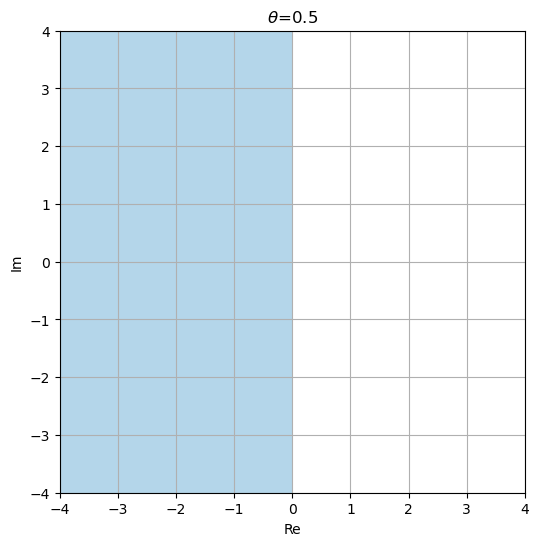

In [33]:
R=theta_stab_fv(0.5)
print(R[0])
stab_tart_theta(R[0], R[1])

In [4]:
def theta_regiok(thetas: list):
    z=sp.symbols('z')
    R=sp.Function('R')
    x=np.linspace(-4,4,600)
    y=np.linspace(-4,4,600)
    X, Y = np.meshgrid(x, y)
    Z=X+1j*Y

    color_pos=np.linspace(0.6,1,len(thetas))
    colormap = cm.get_cmap("Blues",len(thetas))

    fig, ax = plt.subplots(figsize=(6,6), dpi=150)
    for i in range(len(thetas)):
        R=(1+(1-thetas[i])*z)/(1-thetas[i]*z)
        inequality=sp.Eq(R,1)
        inequality=sp.lambdify((z),np.abs(R))
        F1=inequality(Z)
        #color = mcolors.ListedColormap([mcolors.to_hex(colormap(color_pos[i]))])
        color = mcolors.to_hex(colormap(color_pos[i]))
        plt.contourf(X, Y, F1, levels=[-1, 1], colors=[color], alpha=0.4, zorder=i)
        #plt.contour(X, Y, F1, levels=[1], colors=[color], linewidths=2, zorder=i)
        
    ax.text(-1.25, 0, r"$\theta=0$", color="black", fontsize=9, zorder=len(thetas)+1)
    ax.text(-3.25, 2, r"$\theta=$"+f"{thetas[3]:.1f}", color="black", fontsize=9, zorder=len(thetas)+1)
    ax.text(-1.3, 3, r"$\theta=$"+f"{thetas[2]:.1f}", color="black", fontsize=9, zorder=len(thetas)+1)
    ax.text(2.7, 3, r"$\theta=$"+f"{thetas[1]:.1f}", color="black", fontsize=9, zorder=len(thetas)+1)
    ax.text(2.75, 0, r"$\theta=1$", color="black", fontsize=9, zorder=len(thetas)+1)
    
    plt.xlabel(f"Re "+r"$z$")
    plt.ylabel(f"Im "+r"$z$")
    
    #plt.grid()
    plt.show()

    return


C:\Users\temes\AppData\Local\Temp\ipykernel_21668\496129357.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap("Blues",len(thetas))


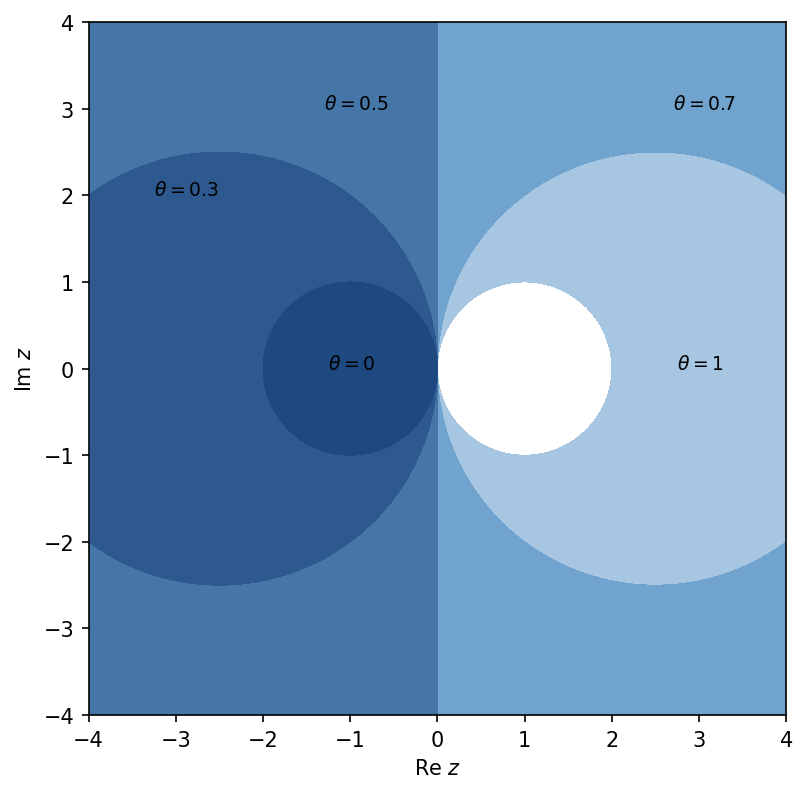

In [5]:
theta_regiok([1,0.7,0.5,0.3,0])